### Feature Selection: Select a subset of input features from the dataset.
#### 1. Unsupervised: Do not use the target variable (e.g. remove redundant variables).
####        1.1 Correlation
####  2.Supervised: Use the target variable (e.g. remove irrelevant variables).
####        2.1 Wrapper: Search for well-performing subsets of features.
#####              2.1.1 RFE
####        2.2 Filter: Select subsets of features based on their relationship with the target.
#####              2.2.1 Statistical Methods
#####              2.2.2 Feature Importance Methods
####        2.3 Intrinsic: Algorithms that perform automatic feature selection during training.
#####             2.3.1 Decision Trees
### 3. Dimensionality Reduction: Project input data into a lower-dimensional feature space.

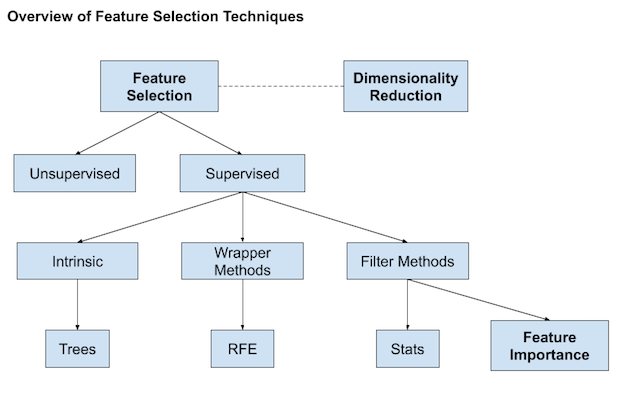

In [1]:

#

import pandas as pd
import numpy as np



url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]

dataframe = pd.read_csv(url, names=names)

array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

dataframe


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.feature_selection import chi2

In [13]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [14]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 4, verbose=1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 4 5 1 1 2]


In [16]:
# feature importance


# plot feature importance manually
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# load data
dataset = pd.read_csv('diabetes.csv')
# split data into X and y
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


[21:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.106 0.242 0.088 0.078 0.104 0.149 0.101 0.132]


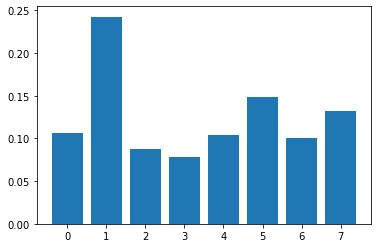

In [17]:
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [18]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [19]:
df  = pd.DataFrame(data = model.feature_importances_ ,columns=['feature_importnace'] ,index=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df

,feature_importnace
Pregnancies,0.106212
Glucose,0.242402
BloodPressure,0.088034
SkinThickness,0.078182
Insulin,0.103819
BMI,0.148673
DiabetesPedigreeFunction,0.100592
Age,0.132086


In [20]:
df.sort_values(by='feature_importnace', ascending=False)

,feature_importnace
Glucose,0.242402
BMI,0.148673
Age,0.132086
Pregnancies,0.106212
Insulin,0.103819
DiabetesPedigreeFunction,0.100592
BloodPressure,0.088034
SkinThickness,0.078182
